In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.arange(-100,100)
y=1/(1+np.exp(-x))

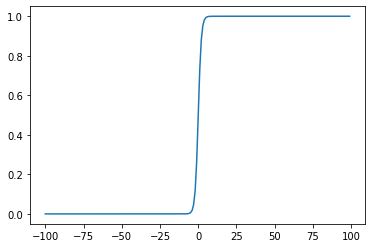

In [3]:
plt.plot(x,y)

In [4]:
adv=pd.read_csv('advertising.csv')

In [5]:
adv

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0


In [6]:
adv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 58.7+ KB


In [7]:
adv['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [8]:
adv.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [9]:
x=adv.iloc[:,[0,1,2,3]].values
y=adv.iloc[:,-1].values
print(x.shape,y.shape)

(1000, 4) (1000,)


In [10]:
x

array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02],
       ...,
       [5.163000e+01, 5.100000e+01, 4.241572e+04, 1.203700e+02],
       [5.555000e+01, 1.900000e+01, 4.192079e+04, 1.879500e+02],
       [4.501000e+01, 2.600000e+01, 2.987580e+04, 1.783500e+02]])

In [11]:
np.set_printoptions(suppress=True)

In [12]:
x


array([[   68.95,    35.  , 61833.9 ,   256.09],
       [   80.23,    31.  , 68441.85,   193.77],
       [   69.47,    26.  , 59785.94,   236.5 ],
       ...,
       [   51.63,    51.  , 42415.72,   120.37],
       [   55.55,    19.  , 41920.79,   187.95],
       [   45.01,    26.  , 29875.8 ,   178.35]])

In [13]:
from sklearn.preprocessing import StandardScaler
# standardize the number based on size of number
# Internal working
# The standard score of a sample x is calculated as: z = (x – u) / s

# x = variable

# u = mean

# s = standard deviation

In [14]:
sc=StandardScaler()
s=sc.fit_transform(x)

In [15]:
s

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   ],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(s,
                                               y ,
                                               test_size= 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(800, 4) (200, 4) (800,) (200,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.97

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        93
           1       0.99      0.95      0.97       107

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [22]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [23]:
print(confusion_matrix(y_test,model.predict(x_test)))

[[ 92   1]
 [  5 102]]


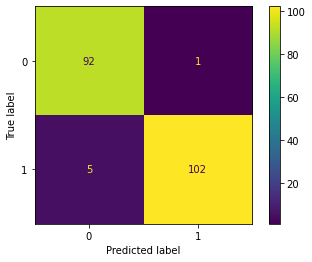

In [24]:
plot_confusion_matrix(model,x_test,y_test)
# here default threshold is 0.5

In [25]:
from sklearn.metrics import plot_roc_curve

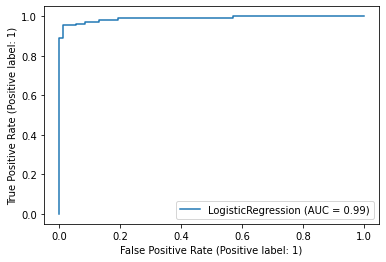

In [26]:
plot_roc_curve(model,x_test,y_test)
# auc=0 then positive become neg an vice versa

In [27]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [28]:
y_prob=model.predict_proba(x_test)
y_prob

array([[0.00002107, 0.99997893],
       [0.99048987, 0.00951013],
       [0.98662972, 0.01337028],
       [0.21307276, 0.78692724],
       [0.99507455, 0.00492545],
       [0.85016369, 0.14983631],
       [0.00005919, 0.99994081],
       [0.00005282, 0.99994718],
       [0.00006746, 0.99993254],
       [0.00051288, 0.99948712],
       [0.0002313 , 0.9997687 ],
       [0.00116494, 0.99883506],
       [0.00446583, 0.99553417],
       [0.00004261, 0.99995739],
       [0.00013695, 0.99986305],
       [0.08742962, 0.91257038],
       [0.98386296, 0.01613704],
       [0.00015688, 0.99984312],
       [0.00004561, 0.99995439],
       [0.0006171 , 0.9993829 ],
       [0.9939045 , 0.0060955 ],
       [0.00677127, 0.99322873],
       [0.00026393, 0.99973607],
       [0.99296635, 0.00703365],
       [0.00016477, 0.99983523],
       [0.91611317, 0.08388683],
       [0.01645996, 0.98354004],
       [0.00070394, 0.99929606],
       [0.98698363, 0.01301637],
       [0.0001534 , 0.9998466 ],
       [0.

In [29]:
def thres(y_prob,threshold):
    yp=list(map(lambda x :1 if x>threshold else 0,y_prob[:,1]))
    return np.array(yp)

In [30]:
ans = thres(y_prob,0.5)

In [31]:
confusion_matrix(y_test,ans)

array([[ 92,   1],
       [  5, 102]], dtype=int64)

In [32]:
# for testing random sample
# first normalize the data using scalermatirx
sample_test=np.array([[69,45,80000,235]]).reshape(-1,4)
sc.transform(sample_test)

array([[0.25242202, 1.02389563, 1.86456889, 1.2534052 ]])

In [33]:
model.predict(sc.transform(sample_test))

array([0], dtype=int64)

In [ ]:
confusion_matrix.